In [1]:
import numpy as np
from fancyimpute import IterativeSVD
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.03058465 0.01938689 0.08784367 ... 0.04945566 0.00303888 0.01516826]
 [0.04956158 0.03141591 0.14234823 ... 0.08014153 0.00492443 0.02457974]
 [0.17895622 0.1134361  0.51398884 ... 0.28937383 0.01778105 0.08875217]
 ...
 [0.21902024 0.13883173 0.62905865 ... 0.35415772 0.02176181 0.10862166]
 [0.25061818 0.15886092 0.71981263 ... 0.40525187 0.02490137 0.12429245]
 [0.03569355 0.02262529 0.10251717 ... 0.05771679 0.0035465  0.01770198]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.14185237  0.04319901  0.02186947 ... -0.00466847 -0.09474386
   0.06907314]
 [-0.07615887 -0.02102712  0.15452135 ... -0.04378429  0.11520309
   0.03554141]
 [ 0.2892867   0.12372196  0.63197336 ...  0.29840895  0.00410331
   0.06676927]
 ...
 [ 0.24242366  0.10337752  0.61433604 ...  0.2184187   0.21816497
   0.04371591]
 [ 0.17544908  0.0977172   0.58834608 ...  0.54955615 -0.10462094
   0.03819793]
 [ 0.14578078  0.04327755  0.10077365 ... -0.01191075  0.05815646
  -0.17

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix)
K=5

[IterativeSVD] Iter 1: observed MAE=0.079273
[IterativeSVD] Iter 2: observed MAE=0.075423
[IterativeSVD] Iter 3: observed MAE=0.068739
[IterativeSVD] Iter 4: observed MAE=0.058204


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.079273
[IterativeSVD] Iter 2: observed MAE=0.075423
[IterativeSVD] Iter 3: observed MAE=0.068739
[IterativeSVD] Iter 4: observed MAE=0.058204
[-0.08495955  0.10084559  0.13837474 -0.13421432  0.0057472  -0.16367765
  0.21828804  0.11259871  0.27658039 -0.08003339  0.16483254  0.06321466
 -0.13025633 -0.11125663 -0.11601978  0.39663434  0.24675812 -0.22381624
 -0.28044558  0.23820234 -0.1444668  -0.25525946 -0.0766346  -0.23483304
 -0.12394772  0.49652086  0.14500522  0.06715288 -0.23872328 -0.06450816
  0.05900602 -0.23867339 -0.01893083  0.08192301 -0.08698723  0.07180735
 -0.11516868 -0.15956455 -0.32602382 -0.19876513  0.29736122  0.0424861
  0.07687061 -0.18069065 -0.04082741  0.26680672  0.3107957   0.2898835
 -0.05612172 -0.148786  ]
[ 0.10310313  0.02001036  0.1906334   0.24578828  0.06790411 -0.1417842
 -0.13661824  0.02406    -0.10143507 -0.22248904 -0.0407

In [6]:

self=  mycebmf
K= self.K          
            # When K>1, sum the outer products across all K components
prod_square_firstmom = np.sum(
                [np.outer(self.L[:, k] ** 2, self.F[:, k].T ** 2) for k in range(self.K)], axis=0
    )
prod_sectmom = np.sum(
                [np.outer(self.L2[:, k], self.F2[:, k]) for k in range(self.K)], axis=0
            )

self.update_fitted_val()  # Update fitted values Y_fit

        # Compute R2 as per the formula
R2 = (self.data- self.Y_fit) ** 2 - prod_square_firstmom + prod_sectmom

 
print(R2)

[[1.69321023e-02 1.07939590e-03 1.38734552e-03 ... 1.64756280e-03
  9.27659834e-03 1.22832228e-03]
 [8.85858987e-03            nan 2.49552490e-07 ... 3.72098477e-03
  2.20822746e-03 4.29839455e-03]
 [1.20995825e-02 1.55654501e-03 2.87128250e-02 ... 9.78189969e-04
  9.24456096e-03 4.14998287e-06]
 ...
 [5.40633698e-04 6.03535172e-04 4.23298202e-03 ... 2.33744943e-03
  7.14160175e-03 2.15438616e-04]
 [1.19334999e-02 2.49382946e-02 2.28494256e-03 ... 2.87778535e-03
  2.76177420e-03 1.00579782e-03]
 [1.00439057e-02 1.39304253e-02 6.05949732e-04 ... 6.64482997e-04
  1.47459828e-03 1.40665149e-02]]


In [7]:
R2 = self.cal_expected_residuals()
self.tau = np.full(self.data.shape, 1 / np.nanmean(R2))
self.tau

array([[145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       ...,
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277]])

In [8]:
self.cal_partial_residuals(k=1)
k=1
lhat , s_l  = compute_hat_l_and_s_l(Z = self.Rk,
                                                            nu = self.F[:,k] ,
                                                            omega= self.F2[:,k], 
                                                            tau= self.tau  )

In [9]:
Z = self.Rk
nu = self.F[:,k]
omega= self.F2[:,k]
tau= self.tau  

In [10]:
# Mask to ignore nan entries in Z
Z_filled = np.nan_to_num(Z, nan=0)
# Set tau to 0 wherever Z has nan values
mask_nan_Z = np.isnan(Z)
tau_spiked = np.copy(tau)  # Make a copy of tau to modify
tau_spiked[mask_nan_Z] = 0

# Now perform the computation with filled arrays
numerator_l_hat = np.sum(tau_spiked * Z_filled * nu, axis=1)
denominator_l_hat = np.sum(tau_spiked  * omega , axis=1)+1e-32
print(numerator_l_hat  )
print(denominator_l_hat  )

[-12.38919855  14.74836762  20.17845064 -19.5717588    0.83808293
 -23.86823984  31.83178243  16.41966971  40.33224499 -11.67084294
  24.03665106   9.21825727 -18.99458687 -16.22396184 -16.91854654
  57.83907285  35.98342221 -32.63793    -40.8958849   34.73577799
 -21.06682317 -37.22312787 -11.17521495 -34.24445114 -18.07463591
  72.40499143  21.14533872   9.79254603 -34.81174441  -9.40688141
   8.60453327 -34.80446909  -2.76058227  11.94639624 -12.68488489
  10.47128361 -16.79443495 -23.26844785 -47.5423169  -28.98485982
  43.36260215   6.19552136  11.20963186 -26.34915424  -5.95364373
  38.90700308  45.32168145  42.27216696  -8.18393123 -21.69667047]
[145.82467277 145.76628247 145.82467277 145.82467277 145.82467277
 145.82467277 145.82467277 145.82467277 145.82467277 145.82467277
 145.82467277 145.82467277 145.82467277 145.82467277 145.82467277
 145.82467277 145.82467277 145.82467277 145.82467277 145.82467277
 145.82467277 145.82467277 145.82467277 145.82467277 145.82467277
 145.8246

In [11]:
Z = self.Rk
nu = self.F[:,k]
omega= self.F2[:,k]
tau= self.tau 

# Mask to ignore nan entries in Z
# Mask to ignore nan entries in Z
mask = ~np.isnan(Z)

# For numerator_l_hat, ignore Z where it is nan
numerator_l_hat = np.sum(tau * Z * nu, axis=1)
numerator_l_hat
denominator_l_hat = np.sum(tau  * omega, axis=1)+1e-32
denominator_l_hat 
tt= compute_hat_l_and_s_l(Z, nu , omega, tau  )
np.sum(tau  * Z* mask * nu , axis=1)


array([-12.38919855,          nan,  20.17845064, -19.5717588 ,
         0.83808293, -23.86823984,  31.83178243,  16.41966971,
        40.33224499, -11.67084294,  24.03665106,   9.21825727,
       -18.99458687, -16.22396184, -16.91854654,  57.83907285,
        35.98342221, -32.63793   , -40.8958849 ,  34.73577799,
       -21.06682317, -37.22312787, -11.17521495, -34.24445114,
       -18.07463591,  72.40499143,  21.14533872,   9.79254603,
       -34.81174441,  -9.40688141,   8.60453327, -34.80446909,
        -2.76058227,  11.94639624, -12.68488489,  10.47128361,
       -16.79443495, -23.26844785, -47.5423169 , -28.98485982,
        43.36260215,   6.19552136,  11.20963186, -26.34915424,
        -5.95364373,  38.90700308,  45.32168145,  42.27216696,
        -8.18393123, -21.69667047])

In [12]:
omega

array([0.01063026, 0.00040041, 0.03634109, 0.06041188, 0.00461097,
       0.02010276, 0.01866454, 0.00057888, 0.01028907, 0.04950137,
       0.00166352, 0.00763907, 0.06888878, 0.00218716, 0.00676332,
       0.00806405, 0.00437637, 0.01451697, 0.00161127, 0.01307186,
       0.03112892, 0.04102879, 0.15766032, 0.00027544, 0.05188671,
       0.01397755, 0.00501633, 0.00108104, 0.03166702, 0.01211106,
       0.15310003, 0.00067294, 0.02933585, 0.00308736, 0.00333266,
       0.00444509, 0.04733548, 0.04229859, 0.01786078, 0.01238443])

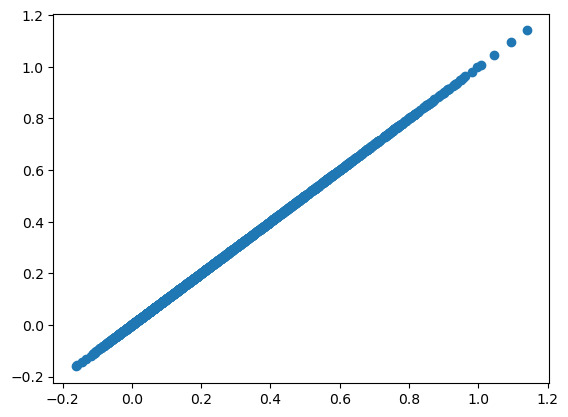

In [13]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

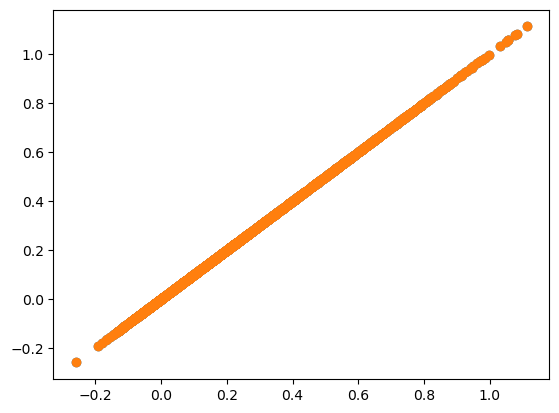

In [14]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [15]:
mycebmf.update_tau()
mycebmf.tau

array([[145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       ...,
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277],
       [145.82467277, 145.82467277, 145.82467277, ..., 145.82467277,
        145.82467277, 145.82467277]])

In [16]:
 
mycebmf.update_loading_factor_k(k=0)

(50, 12)
(40, 12)


(50, 12)
(40, 12)
(50, 5)
(40, 5)
(50, 5)
(40, 5)
(50, 5)
(40, 5)
(50, 5)
(40, 5)


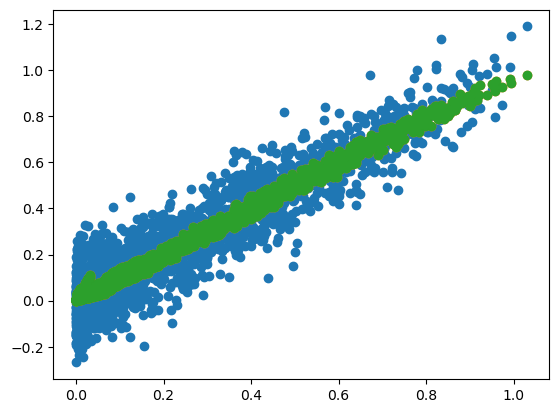

In [32]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

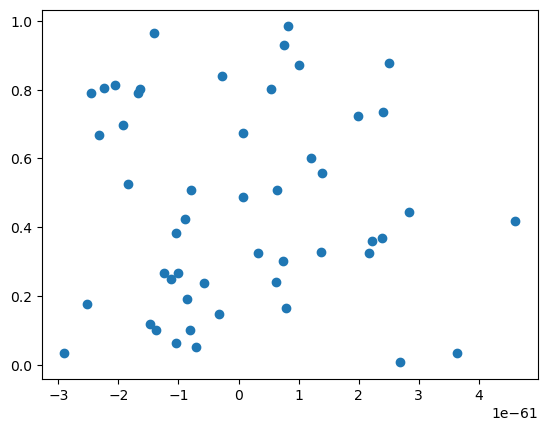

In [33]:
plt.scatter(mycebmf.L[:,0], u)

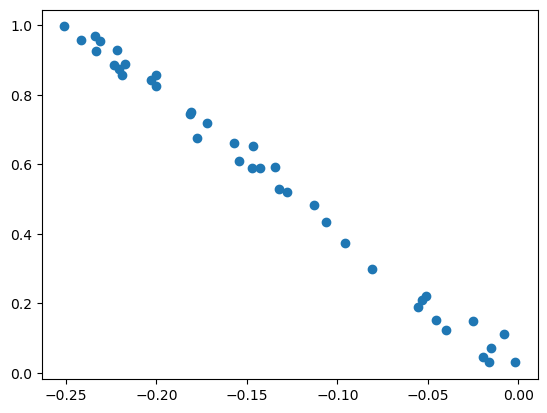

In [34]:
plt.scatter(mycebmf.F[:,0], v)

In [36]:
mycebmf.L[:,1]

array([-8.10122528e-62,  7.82855906e-62,  1.21009601e-61, -1.24813898e-61,
        8.18333845e-63, -1.66663446e-61,  1.98726393e-61,  1.00095448e-61,
        2.49810525e-61, -7.09018120e-62,  1.39543483e-61,  6.27318600e-62,
       -1.12304091e-61, -7.92678922e-62, -1.03332033e-61,  3.64294204e-61,
        2.17299014e-61, -2.05808544e-61, -2.45821959e-61,  2.38357200e-61,
       -1.40185807e-61, -2.31851653e-61, -8.96689076e-62, -2.23367983e-61,
       -1.04874119e-61,  4.60642189e-61,  1.37909599e-61,  6.33750362e-62,
       -2.52347048e-61, -5.69433489e-62,  5.35148779e-62, -1.91718205e-61,
        7.63256115e-63,  7.59860846e-62, -8.55582555e-62,  7.36207331e-62,
       -1.00569109e-61, -1.37404437e-61, -2.89931271e-61, -1.84160522e-61,
        2.83490116e-61,  3.20634092e-62,  8.14942255e-62, -1.63524289e-61,
       -3.32682414e-62,  2.22616229e-61,  2.68821026e-61,  2.40574076e-61,
       -2.68795194e-62, -1.46800328e-61])